## **Preparing Dataset for Classification**

In [1]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import minmax_scale  
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from matplotlib.lines import Line2D


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

import os
print(os.listdir("../input/dataset-wine"))


['vino2.py', 'wine.csv']


In [2]:
# Functions

# Showing Confusion Matrix
def plot_cm(y_true, y_pred, title, figsize=(5,4)):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    plt.title(title)
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)
    
# Showing Incorrect Classification
def plot_comp_test_data(X_test, y_test, y_head, title):
    plt.figure(figsize=(12,6))
    plt.scatter(X_test[:,0], X_test[:,6], c=[colors[i] for i in y_head], marker="*", s=60)
    n = np.size(y_head)
    for i in range(0, n):
        if y_head[i] != y_test[i]:
            plt.scatter(X_test[i,0], X_test[i,6], c=[colors[y_test[i]]], marker="X", s=120, alpha=.4)
    legend_elements = [Line2D([0], [0], marker='*', color='w', label='Prediction', markerfacecolor='k', markersize=14),
                       Line2D([0], [0], marker='X', color='w', label='Correct Class', markerfacecolor='k', markersize=12)]
    plt.legend(handles=legend_elements)
    plt.title(title)
    plt.show()

In [3]:
# Defining dataset and browsing content
data = pd.read_csv('../input/dataset-wine/wine.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
Wine                    178 non-null int64
Alcohol                 178 non-null float64
Malic.acid              178 non-null float64
Ash                     178 non-null float64
Acl                     178 non-null float64
Mg                      178 non-null int64
Phenols                 178 non-null float64
Flavanoids              178 non-null float64
Nonflavanoid.phenols    178 non-null float64
Proanth                 178 non-null float64
Color.int               178 non-null float64
Hue                     178 non-null float64
OD                      178 non-null float64
Proline                 178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [4]:
# Show first 10 sample
data.head(10)

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [5]:
# Split data : X(feature) and y(target) 
X = np.array(data.drop(['Wine'],1))
y = np.array(data['Wine'])

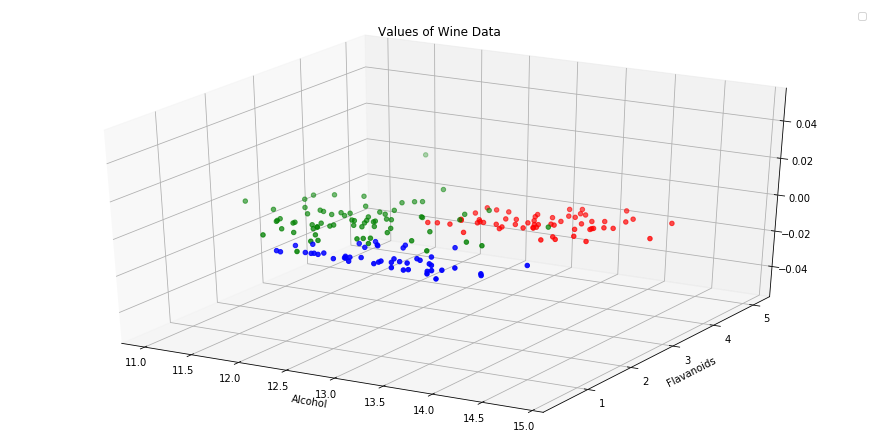

In [6]:
# Visualization Data
fig = plt.figure(1, figsize=(12, 6))
ax = Axes3D(fig)
colors = {1:"r", 2:"g", 3:"b"}
ax.scatter(X[:,0], X[:,6], c=[colors[i] for i in y])
ax.set_xlabel("Alcohol")
ax.set_ylabel("Flavanoids")
plt.title("Values of Wine Data")
ax.legend()
plt.show()

In [7]:
# scaling each feature to a 0 to 1
X = minmax_scale(X)

In [8]:
# Create Train and Test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (133, 13)
y_train (133,)
X_test (45, 13)
y_test (45,)


## **k-Nearest Neighbors (k-NN) Classification**

In [9]:
# Create k-NN classification model with GridSearchCV
# n_neighbors: Number of neighbors to use
# weights: weights is used for distance function (uniform: All points in each neighborhood are weighted equally ||
#                                                 distance: Weight points by the inverse of their distance.)
# p: Power parameter for calculate distance. (1: Manhattan Distance. 2: Eucledian Distance. 3 and upper: Minkowski Distance.)
knn_grid = {"n_neighbors":np.arange(1,15), "weights":["uniform", "distance"], "p":[1, 2, 3] }
knn = GridSearchCV(KNeighborsClassifier(), knn_grid, cv=10, iid=False)
knn.fit(X_train, y_train)

print("k-NN Tuned Hyperparameters", knn.best_params_)
print("k-NN Tuned Best Score:", round(knn.best_score_,3))

k-NN Tuned Hyperparameters {'n_neighbors': 8, 'p': 1, 'weights': 'uniform'}
k-NN Tuned Best Score: 0.977


In [10]:
# Use best classification model
best_clf_knn = knn.best_estimator_
best_clf_knn.fit(X_train, y_train)
knn_y_head = best_clf_knn.predict(X_test)
print("k-Nearest Neighbors (k-NN) Classification Accuracy: {}%" .format(round(best_clf_knn.score(X_test, y_test)*100,2)))

k-Nearest Neighbors (k-NN) Classification Accuracy: 95.56%


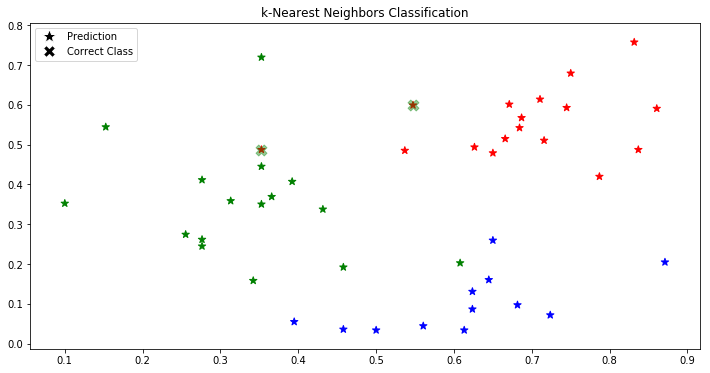

In [11]:
# Show Incorrect Classification
plot_comp_test_data(X_test, y_test, knn_y_head,title="k-Nearest Neighbors Classification")

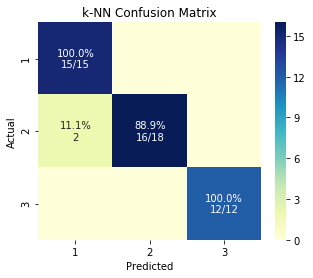

In [12]:
# Show Confusion Matrix
plot_cm(y_test, knn_y_head, title="k-NN Confusion Matrix")

## ** Decision Tree (DT) Classification**

In [13]:
# Create DT classification model with GridSearchCV
# criterion: The function to measure the quality of a split. (Gini: Gini impurity. || Entropy: Information gain)
# min_samples_split: The minimum number of samples required to split an internal node.
# min_samples_leaf: The minimum number of samples required to be at a leaf node.
dtree_grid = {"criterion":["gini", "entropy"], "min_samples_split":[3,4,5,6,7,8,9,10], "min_samples_leaf":[1,2,3,4,5,6,7,8,9]}
dtree = GridSearchCV(DecisionTreeClassifier(random_state=42), dtree_grid, cv=10, iid=False)
dtree.fit(X_train, y_train)

print("DT Tuned Hyperparameters", dtree.best_params_)
print("DT Tuned Best Score:", round(dtree.best_score_,3))

DT Tuned Hyperparameters {'criterion': 'gini', 'min_samples_leaf': 8, 'min_samples_split': 3}
DT Tuned Best Score: 0.956


In [14]:
# Use best classification model
best_clf_dt = dtree.best_estimator_
best_clf_dt.fit(X_train, y_train)
dtree_y_head = best_clf_dt.predict(X_test)
print("Decision Tree (DT) Classification Accuracy: {}%" .format(round(best_clf_dt.score(X_test, y_test)*100,2)))

Decision Tree (DT) Classification Accuracy: 93.33%


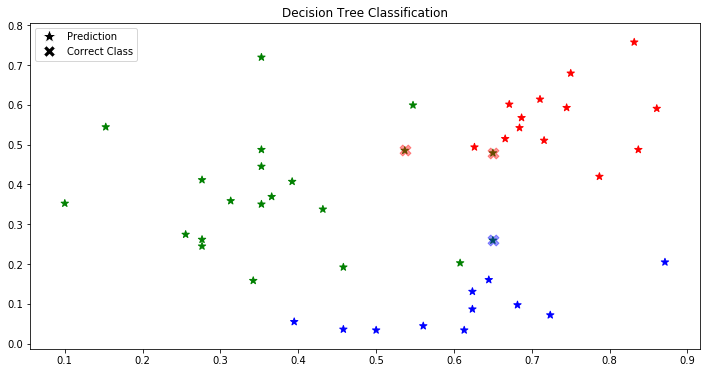

In [15]:
# Show Incorrect Classification
plot_comp_test_data(X_test, y_test, dtree_y_head, title="Decision Tree Classification")

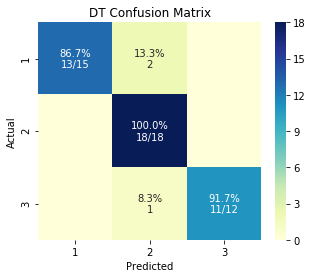

In [16]:
# Show Confusion Matrix 
plot_cm(y_test, dtree_y_head, title="DT Confusion Matrix")

## ** Random Forest (RF) Classification**

In [17]:
# Create RF classification model with GridSearchCV
# n_estimators: The number of trees in the forest.
# criterion, min_samples_split and min_samples_leaf are same to decision tree parameters.
rf_grid = {"n_estimators": [50, 100, 150], "criterion": ["gini", "entropy"],
           "min_samples_split":[3,4,5,6,7,8,9,10], "min_samples_leaf":[1,2,3,4,5,6,7,8,9]}
rforest = GridSearchCV(RandomForestClassifier(random_state=42), rf_grid, cv=10, iid=False)
rforest.fit(X_train, y_train)

print("RF Tuned Hyperparameters", rforest.best_params_)
print("RF Tuned Best Score:", round(rforest.best_score_,3))

RF Tuned Hyperparameters {'criterion': 'entropy', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
RF Tuned Best Score: 0.985


In [18]:
best_clf_rforest = rforest.best_estimator_
best_clf_rforest.fit(X_train, y_train)
rforest_y_head = best_clf_rforest.predict(X_test)
print("Random Forest (RF) Classification Accuracy: {}%" .format(round(best_clf_rforest.score(X_test, y_test)*100,2)))

Random Forest (RF) Classification Accuracy: 97.78%


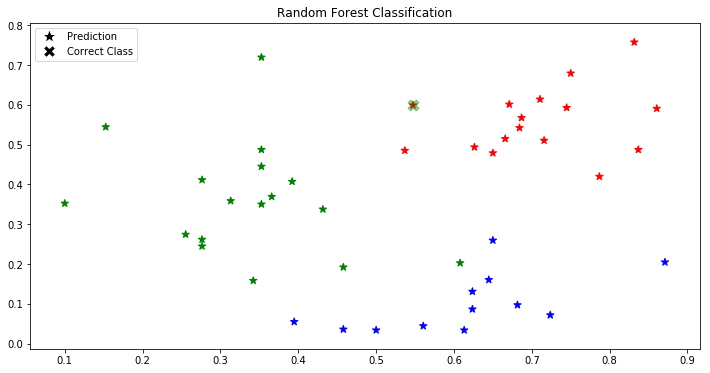

In [19]:
#Show Incorrect Classification
plot_comp_test_data(X_test, y_test, rforest_y_head, title="Random Forest Classification")

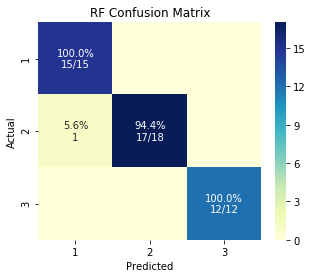

In [20]:
# Show Confusion Matrix
plot_cm(y_test, rforest_y_head, title="RF Confusion Matrix")

## **Support Vector Machine (SVM) Classification**

In [21]:
# Create SVM classification model with GridSearchCV
# C: Penalty parameter C of the error term.
# kernel: Specifies the kernel type to be used in the algorithm.
# gamma: Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
svm_grid = {"C":[0.001, 0.01, 0.1, 1, 10, 100], "kernel":["rbf", "poly", "linear"],
        "gamma":["auto", "scale"]}

svm = GridSearchCV(SVC(decision_function_shape='ovo'), svm_grid, cv=10, iid=False)
svm.fit(X_train, y_train)

print("SVM Tuned Hyperparameters", svm.best_params_)
print("SVM Tuned Best Score:", round(svm.best_score_,3))

SVM Tuned Hyperparameters {'C': 10, 'gamma': 'auto', 'kernel': 'linear'}
SVM Tuned Best Score: 0.985


In [22]:
# Use best classification model
best_clf_svm = svm.best_estimator_
best_clf_svm.fit(X_train, y_train)
svm_y_head = best_clf_svm.predict(X_test)
print("Support Vector Machine (SVM) Classification Accuracy: {}%" .format(round(best_clf_svm.score(X_test, y_test)*100,2)))

Support Vector Machine (SVM) Classification Accuracy: 97.78%


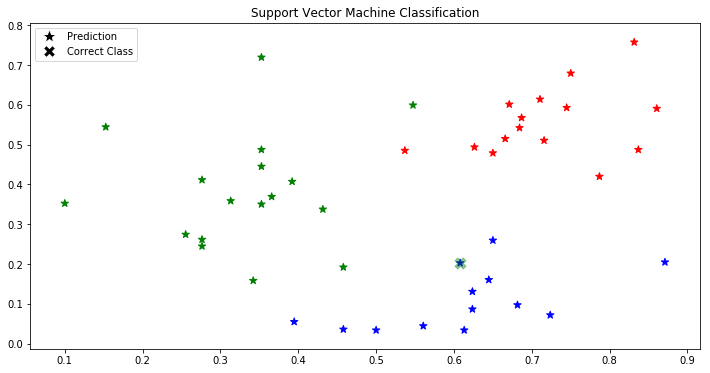

In [23]:
# Show Incorrect Classification
plot_comp_test_data(X_test, y_test, svm_y_head, title="Support Vector Machine Classification")

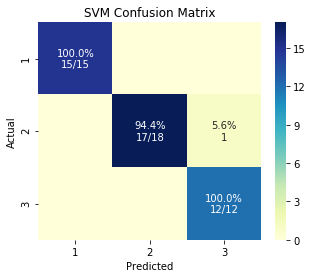

In [24]:
# Show Confusion Matrix 
plot_cm(y_test, svm_y_head, title="SVM Confusion Matrix")

## **Naive Bayes (NB) Classification**

In [25]:
# Create Naive Bayes model GaussianNB classifier
# priors: Prior probabilities of the classes.
nb = GaussianNB(priors=None)
nb.fit(X_train, y_train)

print("Gaussian Naive Bayes (NB) Classification Accuracy: {}%" .format(round(nb.score(X_test, y_test)*100, 2)))
nb_y_head = nb.predict(X_test)

Gaussian Naive Bayes (NB) Classification Accuracy: 100.0%


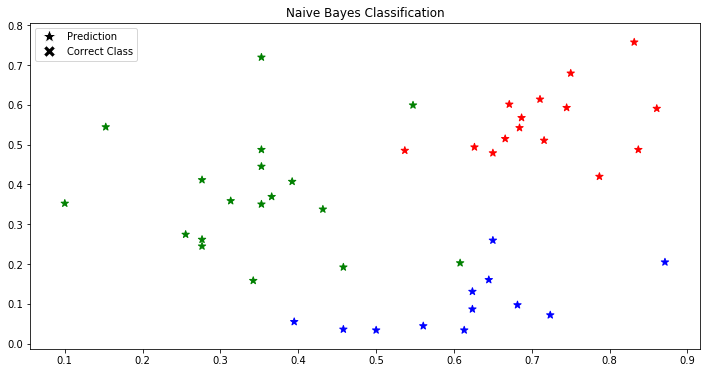

In [26]:
# Show Incorrect Classification
plot_comp_test_data(X_test, y_test, nb_y_head, title="Naive Bayes Classification")

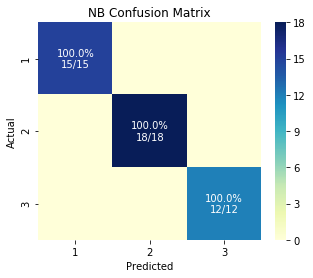

In [27]:
# Show Confusion Matrix
plot_cm(y_test, nb_y_head,title="NB Confusion Matrix")